In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
train=pd.read_csv("/content/drive/MyDrive/esaa OB 3조/방학프로젝트/data/train_preprocessed.csv")
test=pd.read_csv("/content/drive/MyDrive/esaa OB 3조/방학프로젝트/data/test_preprocessed.csv")

In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,93.14,0.0,National
1,1,2013-01-01,41,SEAFOOD,0.0,0.0,Machala,El Oro,D,4,93.14,0.0,National
2,2,2013-01-01,41,SCHOOL AND OFFICE SUPPLIES,0.0,0.0,Machala,El Oro,D,4,93.14,0.0,National
3,3,2013-01-01,41,PRODUCE,0.0,0.0,Machala,El Oro,D,4,93.14,0.0,National
4,4,2013-01-01,41,PREPARED FOODS,0.0,0.0,Machala,El Oro,D,4,93.14,0.0,National


In [ ]:
test.head()

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,dcoilwtico,holiday
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,Weekday
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.8,Weekday
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.8,Weekday
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.8,Weekday
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.8,Weekday


In [ ]:
# date를 datetime 형으로 변경
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705087 entries, 0 to 2705086
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   float64       
 6   city          object        
 7   state         object        
 8   type          object        
 9   cluster       int64         
 10  dcoilwtico    float64       
 11  transactions  float64       
 12  holiday       object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 268.3+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   city         28512 non-null  object        
 6   state        28512 non-null  object        
 7   type         28512 non-null  object        
 8   cluster      28512 non-null  int64         
 9   dcoilwtico   28512 non-null  float64       
 10  holiday      28512 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 2.4+ MB


## 2. 시계열 분석

In [ ]:
### 시계열 분석 시에는 일별 평균값을 활용할 예정

# sales가 없는(0인) 데이터는 제외
train2 = train[train['sales'] != 0]

# 일별 평균 계산
daily_average = train2.groupby(['date'])['sales'].mean()

### 2-1. 시도표

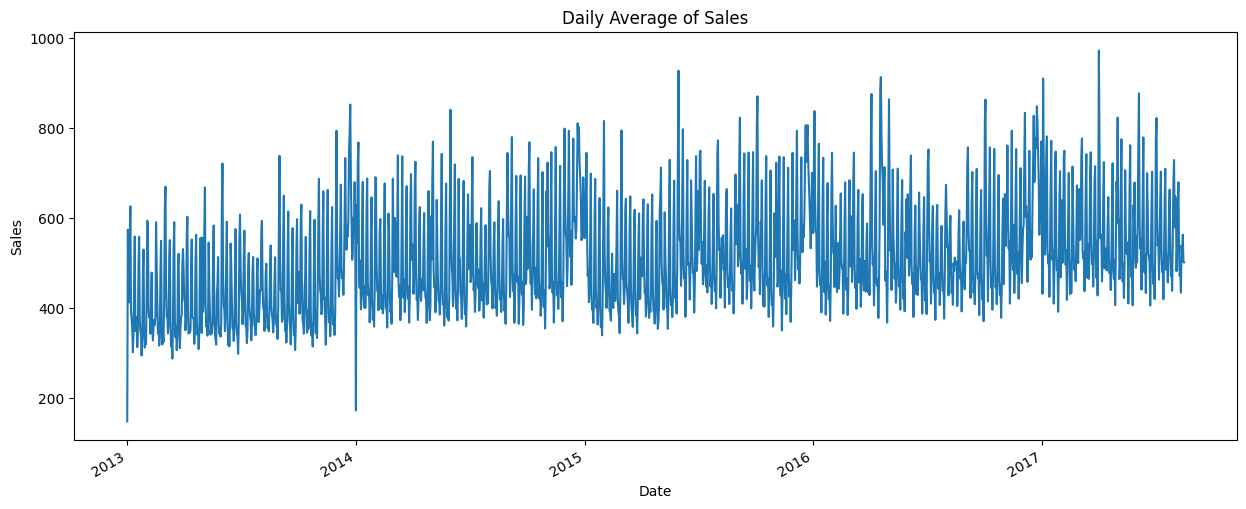

In [ ]:
import matplotlib.pyplot as plt

daily_average.plot(figsize = (15, 6))
plt.title('Daily Average of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### 2-2. 시계열 분해

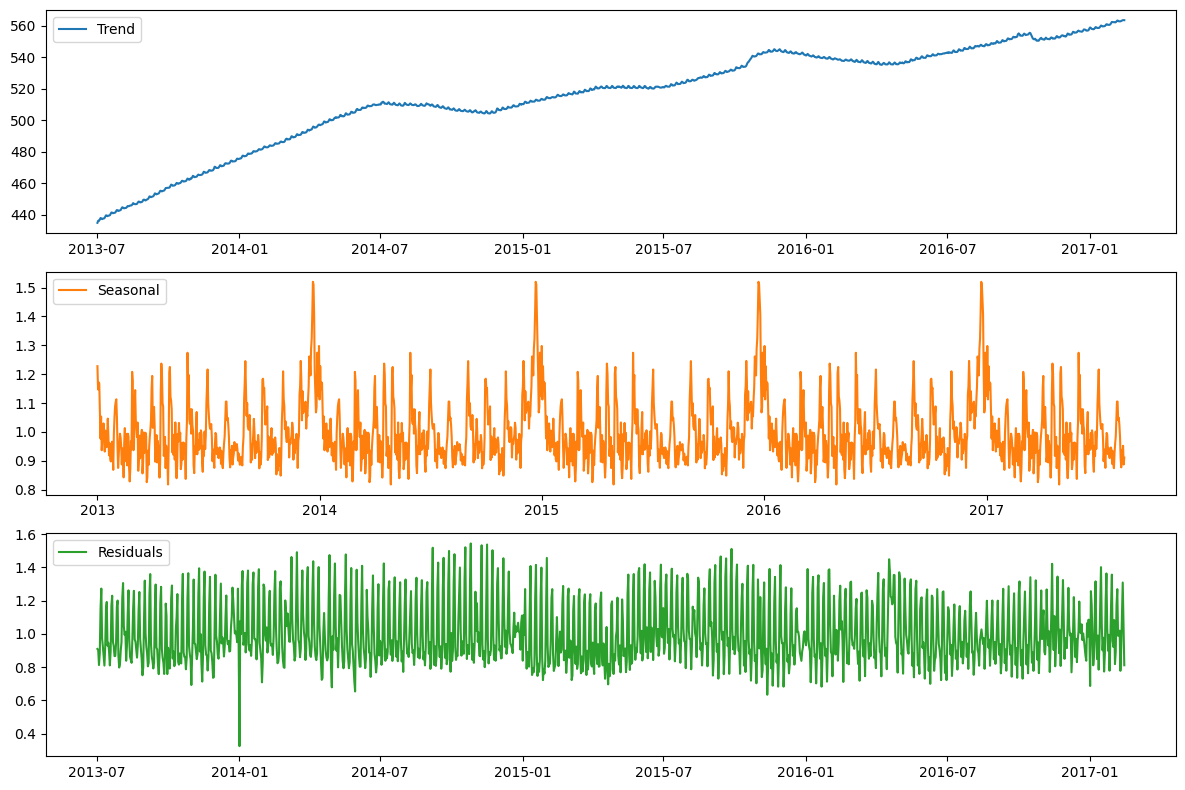

In [ ]:
### 시계열 분석 패키지(ACF, PACF)
import statsmodels.api as sm

## 시계열 데이터 분해(연 단위로 분해)
result = sm.tsa.seasonal_decompose(daily_average, model='multiplicative', period=365)

# 색상 설정
colors = plt.cm.tab10.colors

# 시각화
plt.figure(figsize=(12, 8))

# 추세(Trend)
plt.subplot(3, 1, 1)
plt.plot(result.trend, label='Trend', color=colors[0])
plt.legend(loc='upper left')

# 계절성(Seasonality)
plt.subplot(3, 1, 2)
plt.plot(result.seasonal, label='Seasonal', color=colors[1])
plt.legend(loc='upper left')

# 잔차(Residuals) 분석
plt.subplot(3, 1, 3)
plt.plot(result.resid, label='Residuals', color=colors[2])
plt.legend(loc='upper left')

# 레이아웃 조정
plt.tight_layout()

# 시각화 표시
plt.show()

### 2-3 정상성

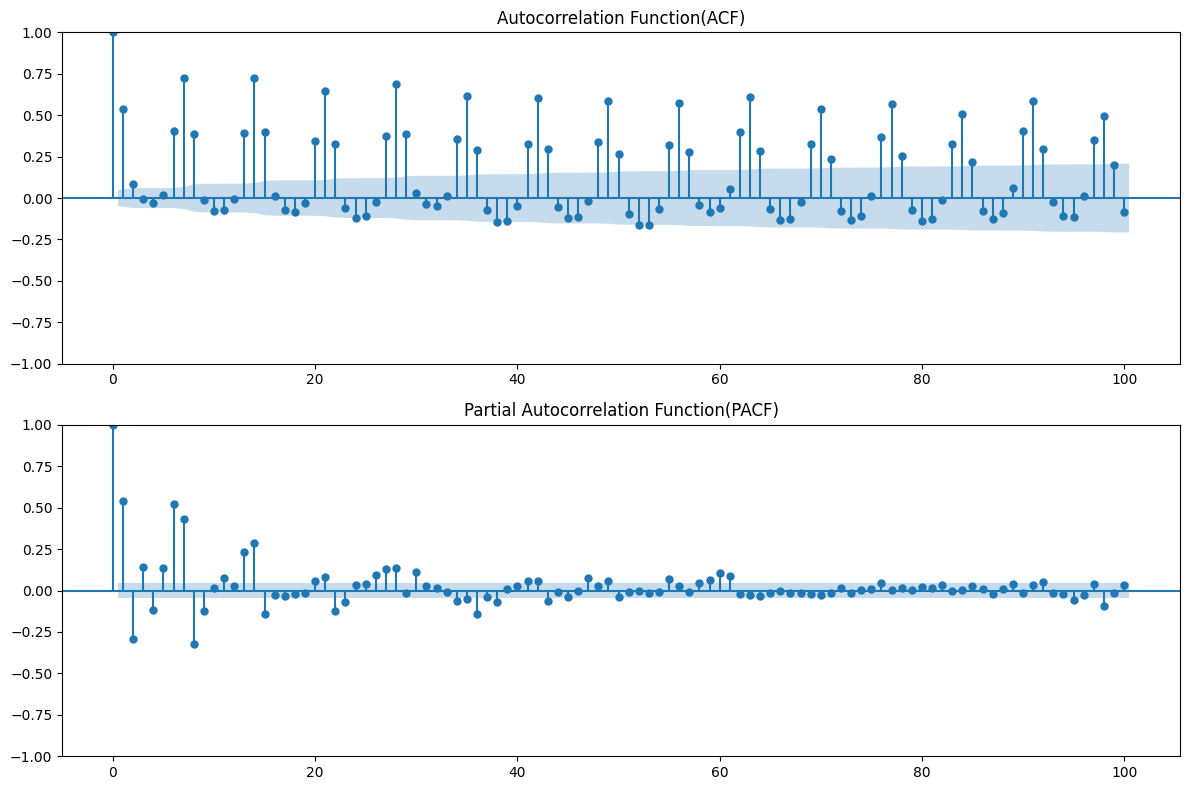

In [ ]:
# ACF 및 PACF 계산 및 시각화
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF 시각화
sm.graphics.tsa.plot_acf(daily_average, lags=100, ax=axes[0])
axes[0].set_title('Autocorrelation Function(ACF)')

# PACF 시각화
sm.graphics.tsa.plot_pacf(daily_average, lags=100, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function(PACF)')

# 레이아웃 조정
plt.tight_layout()

# 시각화 표시
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF 검정 수행
result = adfuller(daily_average)

# 결과 출력
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.077050002235016
p-value: 0.001056669423237086


In [ ]:
### 더 이상 일자가 연속될 필요가 없으므로 'sales'가 0인 데이터 삭제

train = train[train['sales'] != 0]

In [ ]:
train['year'] = train['date'].dt.year # 연도
train['quarter'] = train['date'].dt.quarter # 분기별
train['month'] = train['date'].dt.month # 월
train['day_of_week'] = train['date'].dt.dayofweek # 요일

In [ ]:
test['year'] = test['date'].dt.year # 연도
test['quarter'] = test['date'].dt.quarter # 분기별
test['month'] = test['date'].dt.month # 월
test['day_of_week'] = test['date'].dt.dayofweek # 요일

## 3. EDA

In [ ]:
# 데이터릍 타입별로 분리
typeE = train.loc[train['type'] == 'E', :]
typeE_te = test.loc[test['type'] == 'E', :]
typeE = typeE.drop('type', axis = 1) # 더 이상 type 변수는 필요 없으므로 삭제
typeE_te = typeE_te.drop('type', axis = 1) # 더 이상 type 변수는 필요 없으므로 삭제

In [ ]:
typeE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137052 entries, 1491 to 2705032
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            137052 non-null  int64         
 1   date          137052 non-null  datetime64[ns]
 2   store_nbr     137052 non-null  int64         
 3   family        137052 non-null  object        
 4   sales         137052 non-null  float64       
 5   onpromotion   137052 non-null  float64       
 6   city          137052 non-null  object        
 7   state         137052 non-null  object        
 8   cluster       137052 non-null  int64         
 9   dcoilwtico    137052 non-null  float64       
 10  transactions  136815 non-null  float64       
 11  holiday       137052 non-null  object        
 12  year          137052 non-null  int64         
 13  quarter       137052 non-null  int64         
 14  month         137052 non-null  int64         
 15  day_of_week  

### 이상치 제거

In [ ]:
### 이상치 탐지 함수

def get_outlier_indices(df_col, weight=3):
    q1, q3 = np.percentile(df_col, [25, 75])
    iqr = q3 - q1
    iqr_weight = iqr * weight

    lowest_val, highest_val = q1 - iqr_weight, q3 + iqr_weight
    outlier_indices = df_col[(df_col < lowest_val) | (df_col > highest_val)].index

    return outlier_indices

In [ ]:
typeE.shape

(137052, 16)

In [ ]:
cols = ['store_nbr', 'family']

# 제거할 행(row)의 인덱스를 저장
rows_to_drop = []
import numpy as np

for col in cols:
    # 'store_nbr', 'family'을 기준으로 데이터를 그룹화
    grouped = typeE.groupby(cols)
    # 각 그룹에 대해 이상치를 찾아내고 인덱스를 추가
    for (_, group_data) in grouped:
        outlier_indices = get_outlier_indices(group_data['sales'], weight=3)
        rows_to_drop.extend(outlier_indices)

# 이상치 제거
typeE = typeE.drop(rows_to_drop)

In [ ]:
typeE.shape

(135476, 16)

이상치가 어느정도 제거됨이 확인

## 🚀 store_nbr

In [ ]:
# 고유한 매장 수
typeE['store_nbr'].unique()

array([43, 28, 36, 29])

In [ ]:
### 각 매장별 매출 총액 시도표(일 단위)
import plotly.express as px # 동적 시각화
a = typeE.set_index("date").groupby("store_nbr").resample("D").sales.sum().reset_index()
px.line(a,x='date',y='sales',color='store_nbr')

- 28번 store가 대체로 판매량이 제일 높음
- 29번 store는 2015년 이후에 개장한 점이 확인됨
- 36번 store도 28번, 43번 store에 비해 늦게 개장한 점이 확인됨

## 🚀 family

<ipython-input-25-c81574dfdd10>:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




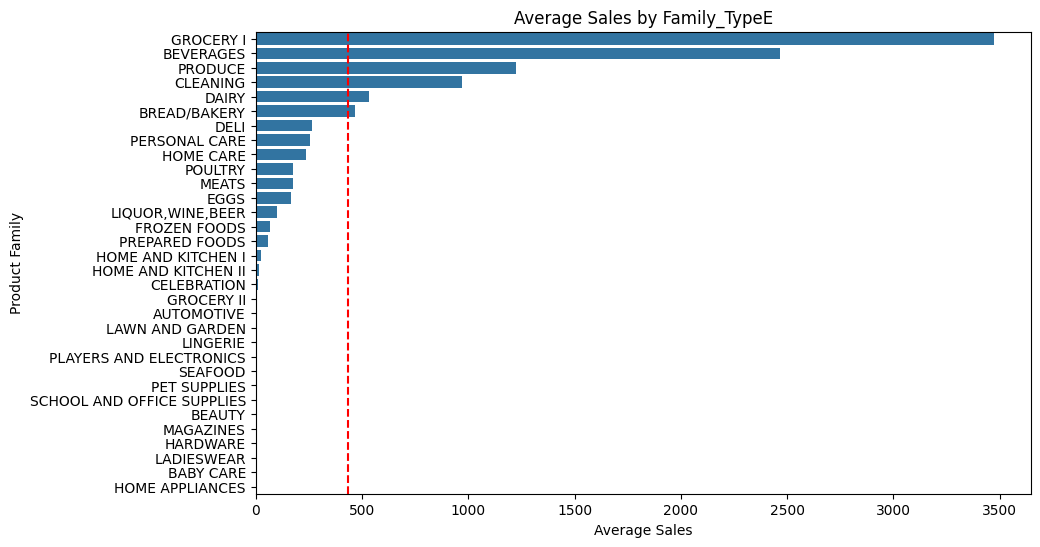

In [ ]:
### 각 품목별로 매출에 미치는 영향

# 각 family 별로 'sales'의 평균을 계산하고, 내림차순으로 정렬
average_sales_by_family = typeE.groupby('family')['sales'].mean().sort_values(ascending=False)

## 시각화
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='sales', y='family', data=typeE, order=average_sales_by_family.index, ci=None)
plt.axvline(x=typeE['sales'].mean(), color='red', linestyle='--') # 매출 전체 평균

# 그래프 제목 및 레이블 설정
plt.title('Average Sales by Family_TypeE')
plt.xlabel('Average Sales')
plt.ylabel('Product Family')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



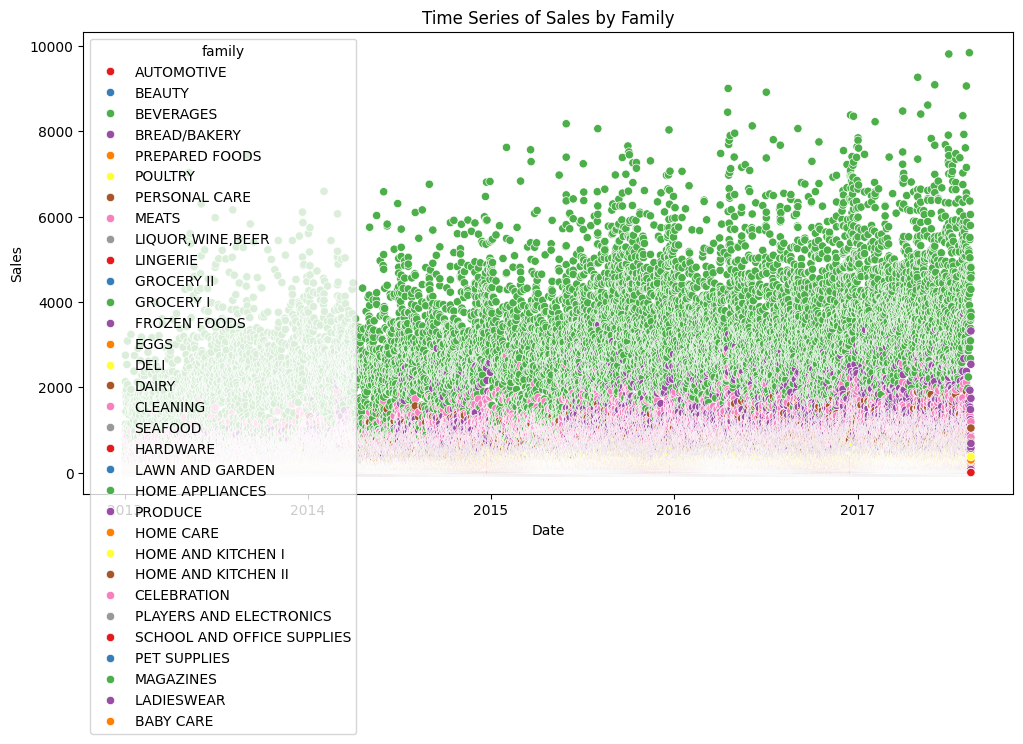

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='sales', hue='family', data=typeE, palette='Set1')
plt.title('Time Series of Sales by Family')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
typeE['family'].nunique()

32

In [ ]:
typeE.shape

(135476, 16)

Grocery가 가장 높음

32개 모두 원핫인코딩 해야할 듯

하지만 typeE의 경우 row수가 137052개이므로 원래 train보다 row수가 적어지니 라벨인코딩도 고려 대상

## 🚀onpromotion

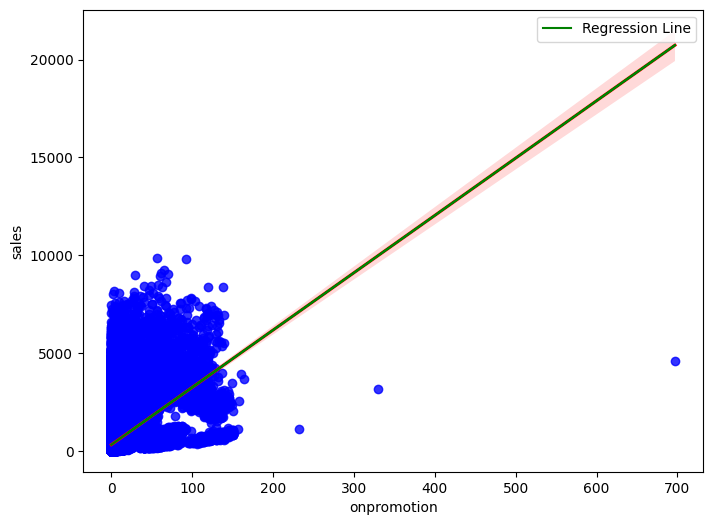

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                 3.666e+04
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:41:49   Log-Likelihood:            -1.1008e+06
No. Observations:              135476   AIC:                         2.202e+06
Df Residuals:                  135474   BIC:                         2.202e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         307.9767      2.317    132.898      

In [ ]:
import statsmodels.api as sm
# 회귀 모델 적합
model = sm.OLS(typeE['sales'], sm.add_constant(typeE['onpromotion']))
results = model.fit()

# 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x='onpromotion', y='sales', data=typeE, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.plot(typeE['onpromotion'], results.fittedvalues, color='green', label='Regression Line')
plt.legend()
plt.show()

# 회귀 결과 출력
print(results.summary())

*sales=309.1303+29.0104×onpromotion*
: 약한 양의 상관관계를 보임

## 🚀state

In [ ]:
# 고유한 주(state) 수

typeE['state'].unique()

array(['Esmeraldas', 'Guayas'], dtype=object)

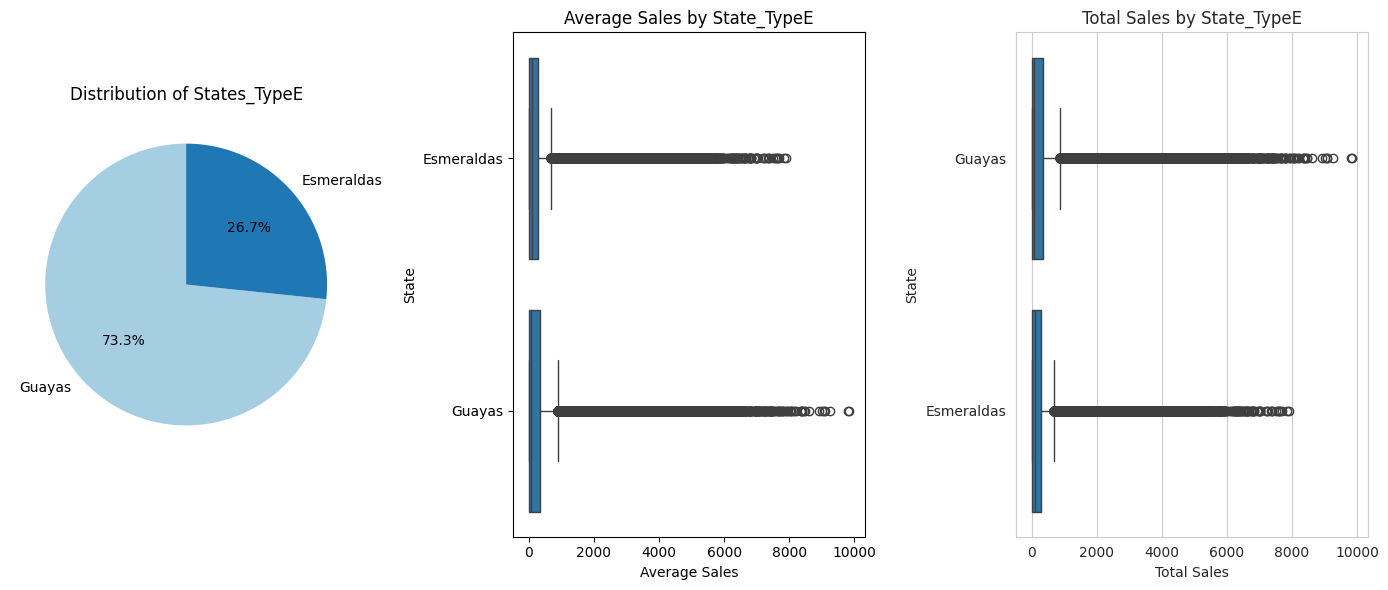

In [ ]:
plt.figure(figsize=(14, 6))

# 첫 번째 subplot: 파이 차트
plt.subplot(1, 3, 1)
state_counts = typeE['state'].value_counts()
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of States_TypeE')

# 두 번째 subplot: 박스 그래프
plt.subplot(1, 3, 2)
average_sales_by_state = typeE.groupby('state')['sales'].mean().sort_values(ascending=False)
sns.set_style("whitegrid")
sns.boxplot(x='sales', y='state', data=typeE, order=average_sales_by_state.index,orient='h')
plt.title('Average Sales by State_TypeE')
plt.xlabel('Average Sales')
plt.ylabel('State')


# 세 번째 subplot: 박스 그래프
plt.subplot(1, 3, 3)
average_sales_by_state = typeE.groupby('state')['sales'].sum().sort_values(ascending=False)
sns.set_style("whitegrid")
sns.boxplot(x='sales', y='state', data=typeE, order=average_sales_by_state.index,orient='h')


plt.title('Total Sales by State_TypeE')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.tight_layout()
plt.show()


typeE에서는 stae 중 Guayas의 값이 더 많고 average sales의 경우 Guayas에 더 이상치가 많음. 그리고 total sales의 경우에도 마찬가지로

In [ ]:
typeE.groupby('state')['store_nbr'].unique()

state
Esmeraldas            [43]
Guayas        [28, 36, 29]
Name: store_nbr, dtype: object

## 🚀 city

In [ ]:
typeE.groupby('city')['store_nbr'].unique()

city
Esmeraldas        [43]
Guayaquil     [28, 29]
Libertad          [36]
Name: store_nbr, dtype: object

In [ ]:
typeE.groupby('state')['city'].unique()

state
Esmeraldas             [Esmeraldas]
Guayas        [Guayaquil, Libertad]
Name: city, dtype: object

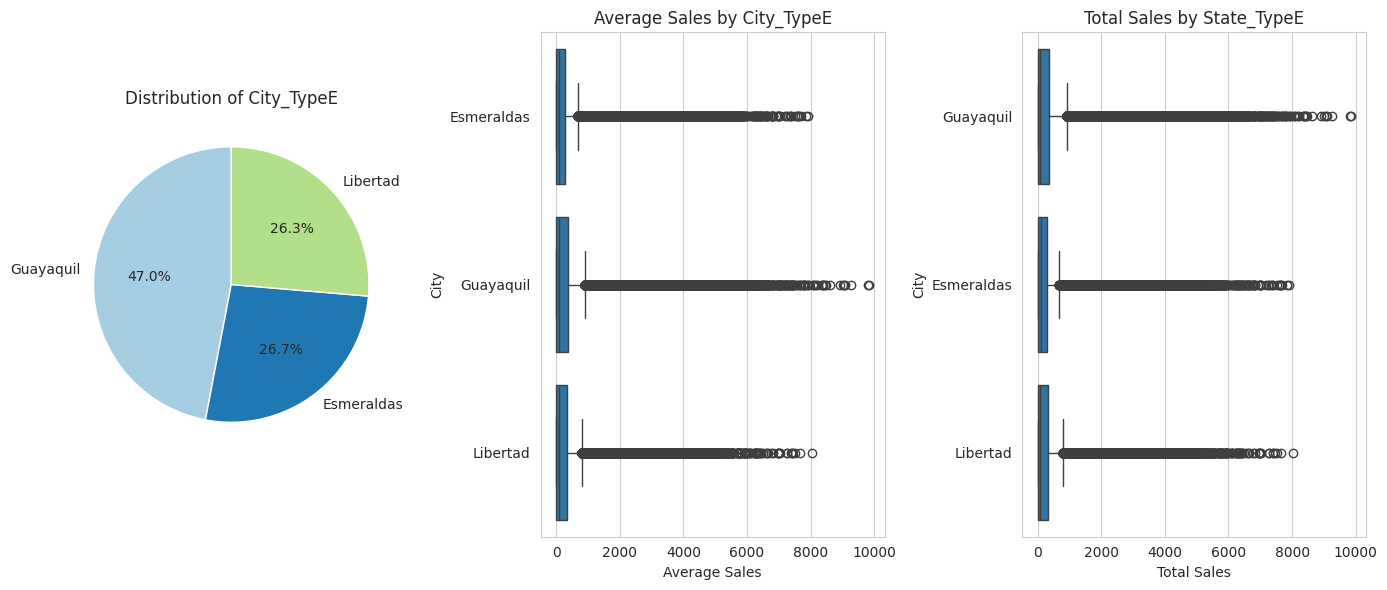

In [ ]:
plt.figure(figsize=(14, 6))

# 첫 번째 subplot: 파이 차트
plt.subplot(1, 3, 1)
city_counts = typeE['city'].value_counts()
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of City_TypeE')

# 두 번째 subplot: 박스 그래프
plt.subplot(1, 3, 2)
average_sales_by_state = typeE.groupby('city')['sales'].mean().sort_values(ascending=False)
sns.set_style("whitegrid")
sns.boxplot(x='sales', y='city', data=typeE, order=average_sales_by_state.index)

plt.title('Average Sales by City_TypeE')
plt.xlabel('Average Sales')
plt.ylabel('City')


# 세 번째 subplot: 박스 그래프
plt.subplot(1, 3, 3)
sns.set_style("whitegrid")
average_sales_by_state = typeE.groupby('city')['sales'].sum().sort_values(ascending=False)
sns.boxplot(x='sales', y='city', data=typeE, order=average_sales_by_state.index,orient='h')


plt.title('Total Sales by State_TypeE')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

city가 state에 비해 고르게 분포되어 있음 + city가 state의 하위변수이므로 state를 삭제하고 city로만 원핫인코딩할것

또한 average sales의 경우 Guayaquil에 이상치가 많고 total sales도 마찬가지

average sales의 값은 Esmeraldas가 Guayaquil보다 높고 total sales의 경우 그 반대임. 이상치 때문에 아닐까 생각됨

## 🚀dcoilwtico

In [ ]:
import plotly.express as px

daily_oil_price = typeE.groupby("date")["dcoilwtico"].mean().reset_index()

# 그래프 그리기
fig = px.line(daily_oil_price, x="date", y="dcoilwtico", title="Daily DcoilWTICO Prices")
fig.show()

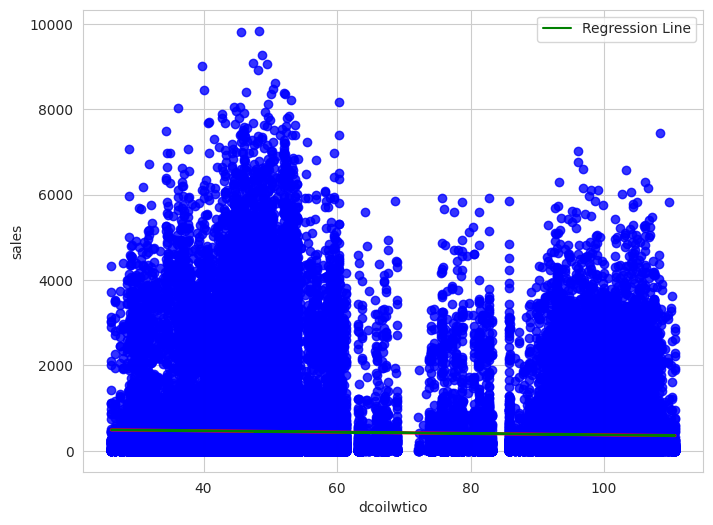

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     224.2
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           1.23e-50
Time:                        02:42:15   Log-Likelihood:            -1.1169e+06
No. Observations:              135476   AIC:                         2.234e+06
Df Residuals:                  135474   BIC:                         2.234e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        530.5129      6.921     76.655      0.0

In [ ]:
# 회귀 모델 적합
model = sm.OLS(typeE['sales'], sm.add_constant(typeE['dcoilwtico']))
results = model.fit()

# 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x='dcoilwtico', y='sales', data=typeE, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.plot(typeE['dcoilwtico'], results.fittedvalues, color='green', label='Regression Line')
plt.legend()
plt.show()

# 회귀 결과 출력
print(results.summary())

*sales=536.66755-1.6429×dcoilwtico*
: 매우 약한 음의 상관관계를 보임

## 🚀holiday

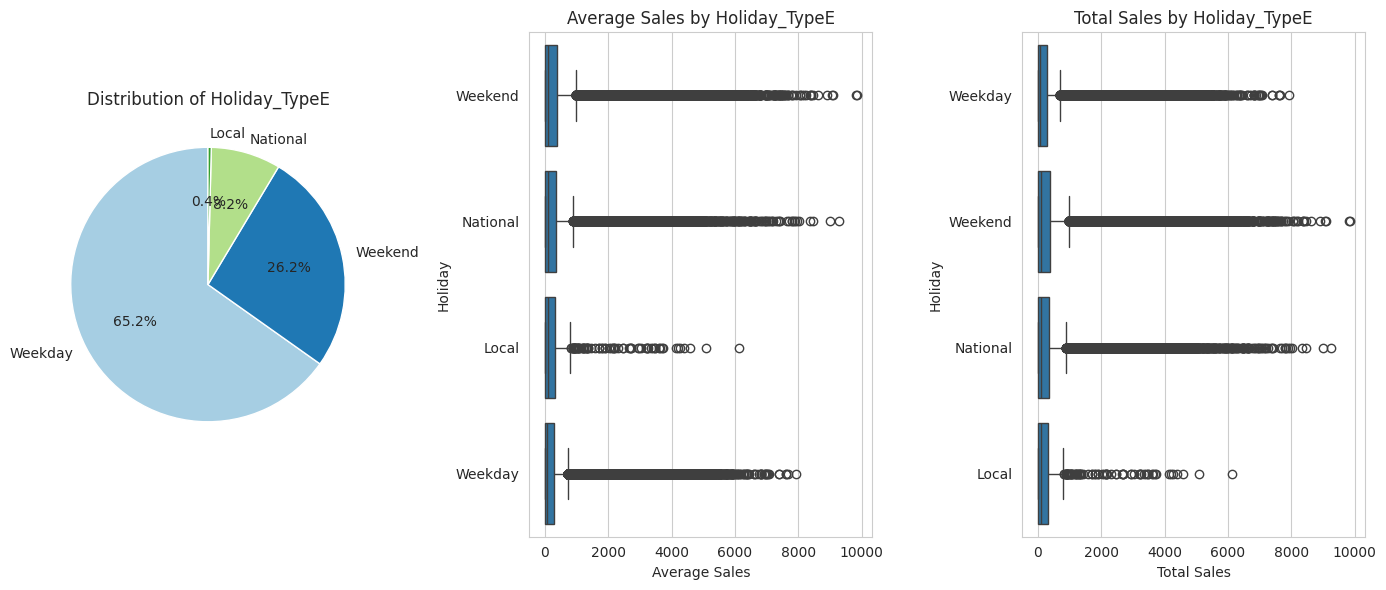

In [ ]:
plt.figure(figsize=(14, 6))

# 첫 번째 subplot: 파이 차트
plt.subplot(1, 3, 1)
holiday_counts = typeE['holiday'].value_counts()
plt.pie(holiday_counts, labels=holiday_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Holiday_TypeE')

# 두 번째 subplot: 박스 그래프
plt.subplot(1, 3, 2)
average_sales_by_state = typeE.groupby('holiday')['sales'].mean().sort_values(ascending=False)
sns.set_style("whitegrid")
sns.boxplot(x='sales', y='holiday', data=typeE, order=average_sales_by_state.index,orient='h')
plt.title('Average Sales by Holiday_TypeE')
plt.xlabel('Average Sales')
plt.ylabel('Holiday')


# 세 번째 subplot: 박스 그래프
plt.subplot(1, 3, 3)
average_sales_by_state = typeE.groupby('holiday')['sales'].sum().sort_values(ascending=False)
sns.set_style("whitegrid")
sns.boxplot(x='sales', y='holiday', data=typeE, order=average_sales_by_state.index,orient='h')

plt.title('Total Sales by Holiday_TypeE')
plt.xlabel('Total Sales')
plt.ylabel('Holiday')
plt.tight_layout()
plt.show()

## 🚀cluster

In [ ]:
typeE['cluster'].value_counts()
# cluster 변수 빼기로 결정

10    135476
Name: cluster, dtype: int64

In [ ]:
typeE_te.head()

,id,date,store_nbr,family,onpromotion,city,state,cluster,dcoilwtico,holiday,year,quarter,month,day_of_week
660,3001548,2017-08-16,28,AUTOMOTIVE,0,Guayaquil,Guayas,10,46.8,Weekday,2017,3,8,2
661,3001549,2017-08-16,28,BABY CARE,0,Guayaquil,Guayas,10,46.8,Weekday,2017,3,8,2
662,3001550,2017-08-16,28,BEAUTY,2,Guayaquil,Guayas,10,46.8,Weekday,2017,3,8,2
663,3001551,2017-08-16,28,BEVERAGES,47,Guayaquil,Guayas,10,46.8,Weekday,2017,3,8,2
664,3001552,2017-08-16,28,BOOKS,0,Guayaquil,Guayas,10,46.8,Weekday,2017,3,8,2


In [ ]:
typeE.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,cluster,dcoilwtico,transactions,holiday,year,quarter,month,day_of_week
1491,1491,2013-01-02,43,AUTOMOTIVE,2.0,0.0,Esmeraldas,Esmeraldas,10,93.14,1385.0,Weekday,2013,1,1,2
1517,1517,2013-01-02,43,BEAUTY,2.0,0.0,Esmeraldas,Esmeraldas,10,93.14,1385.0,Weekday,2013,1,1,2
1546,1546,2013-01-02,43,BEVERAGES,1137.0,0.0,Esmeraldas,Esmeraldas,10,93.14,1385.0,Weekday,2013,1,1,2
1548,1548,2013-01-02,43,BREAD/BAKERY,291.0,0.0,Esmeraldas,Esmeraldas,10,93.14,1385.0,Weekday,2013,1,1,2
1602,1602,2013-01-02,43,PREPARED FOODS,35.0,0.0,Esmeraldas,Esmeraldas,10,93.14,1385.0,Weekday,2013,1,1,2


In [ ]:
typeE.groupby('city')['store_nbr'].unique()

city
Esmeraldas        [43]
Guayaquil     [28, 29]
Libertad          [36]
Name: store_nbr, dtype: object

type

city도 store_nbr이 더 하위변수이니까 그냥 빼기..

In [ ]:
typeE.drop(['state','cluster','transactions','city'],axis=1,inplace=True)
typeE_te.drop(['state','cluster','city'],axis=1,inplace=True)

In [ ]:
typeE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135476 entries, 1491 to 2705032
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           135476 non-null  int64         
 1   date         135476 non-null  datetime64[ns]
 2   store_nbr    135476 non-null  int64         
 3   family       135476 non-null  object        
 4   sales        135476 non-null  float64       
 5   onpromotion  135476 non-null  float64       
 6   dcoilwtico   135476 non-null  float64       
 7   holiday      135476 non-null  object        
 8   year         135476 non-null  int64         
 9   quarter      135476 non-null  int64         
 10  month        135476 non-null  int64         
 11  day_of_week  135476 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 13.4+ MB


In [ ]:
typeE_te.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 660 to 27983
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           2112 non-null   int64         
 1   date         2112 non-null   datetime64[ns]
 2   store_nbr    2112 non-null   int64         
 3   family       2112 non-null   object        
 4   onpromotion  2112 non-null   int64         
 5   dcoilwtico   2112 non-null   float64       
 6   holiday      2112 non-null   object        
 7   year         2112 non-null   int64         
 8   quarter      2112 non-null   int64         
 9   month        2112 non-null   int64         
 10  day_of_week  2112 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 198.0+ KB


In [ ]:
# 왜도 확인
typeE[['sales', 'onpromotion','dcoilwtico']].skew()

sales          3.415877
onpromotion    6.234087
dcoilwtico     0.843906
dtype: float64

In [ ]:
import numpy as np
print(np.log1p(typeE['sales']).skew())
print(np.log1p(typeE['onpromotion']).skew())

0.04477356047714623
1.9254910586532548


왜도가 작아지는 걸 확인. 로그 변환 하기

In [ ]:
typeE['sales']=np.log1p(typeE['sales'])
typeE['onpromotion']=np.log1p(typeE['onpromotion'])

In [ ]:
typeE_te['onpromotion'] = np.log1p(typeE_te['onpromotion'])

### Train/Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(typeE, test_size=0.3, random_state=42, stratify=typeE[['store_nbr', 'family']]) # 가게별, 제품군별 비율 유지

수치형 변수 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected variables
train[['onpromotion', 'dcoilwtico']] = scaler.fit_transform(train[['onpromotion', 'dcoilwtico']])
val[['onpromotion', 'dcoilwtico']] = scaler.transform(val[['onpromotion', 'dcoilwtico']])
typeE_te[['onpromotion', 'dcoilwtico']] = scaler.transform(typeE_te[['onpromotion', 'dcoilwtico']])

In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday,year,quarter,month,day_of_week
1462278,1462278,2015-08-16,36,BEVERAGES,8.010692,0.450022,-0.797044,Weekend,2015,3,8,6
1947147,1947147,2016-05-28,28,PLAYERS AND ELECTRONICS,2.302585,-0.540343,-0.495908,Weekend,2016,2,5,5
2167917,2167917,2016-10-05,29,"LIQUOR,WINE,BEER",3.295837,-0.540343,-0.476580,Weekday,2016,4,10,2
330221,330221,2013-08-11,36,HOME APPLIANCES,0.693147,-0.540343,1.903392,Weekend,2013,3,8,6
1328762,1328762,2015-05-25,29,"LIQUOR,WINE,BEER",3.713572,-0.540343,-0.140047,Weekday,2015,2,5,0


In [ ]:
val.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday,year,quarter,month,day_of_week
1624544,1624544,2015-11-20,28,GROCERY I,7.796336,1.699722,-0.913943,Weekday,2015,4,11,4
602185,602185,2014-02-07,36,LINGERIE,0.693147,-0.540343,1.643957,Weekday,2014,1,2,4
2018665,2018665,2016-07-09,43,POULTRY,4.776751,-0.540343,-0.673666,Weekend,2016,3,7,5
557420,557420,2014-01-09,43,DAIRY,5.669881,-0.540343,1.280050,Weekday,2014,1,1,3
1490349,1490349,2015-09-02,43,BEVERAGES,8.360305,0.084507,-0.622227,Weekday,2015,3,9,2


In [ ]:
train = pd.get_dummies(train, columns=['store_nbr','family', 'holiday', 'year', 'quarter', 'month', 'day_of_week'])
train.head()

,id,date,sales,onpromotion,dcoilwtico,store_nbr_28,store_nbr_29,store_nbr_36,store_nbr_43,family_AUTOMOTIVE,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
1462278,1462278,2015-08-16,8.010692,0.450022,-0.797044,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1947147,1947147,2016-05-28,2.302585,-0.540343,-0.495908,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2167917,2167917,2016-10-05,3.295837,-0.540343,-0.476580,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
330221,330221,2013-08-11,0.693147,-0.540343,1.903392,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1328762,1328762,2015-05-25,3.713572,-0.540343,-0.140047,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
val = pd.get_dummies(val, columns=['store_nbr','family', 'holiday', 'year', 'quarter', 'month', 'day_of_week'])
val.head()

,id,date,sales,onpromotion,dcoilwtico,store_nbr_28,store_nbr_29,store_nbr_36,store_nbr_43,family_AUTOMOTIVE,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
1624544,1624544,2015-11-20,7.796336,1.699722,-0.913943,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
602185,602185,2014-02-07,0.693147,-0.540343,1.643957,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2018665,2018665,2016-07-09,4.776751,-0.540343,-0.673666,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
557420,557420,2014-01-09,5.669881,-0.540343,1.280050,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1490349,1490349,2015-09-02,8.360305,0.084507,-0.622227,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
typeE_te = pd.get_dummies(typeE_te, columns=['store_nbr','family', 'holiday', 'year', 'quarter', 'month', 'day_of_week'])
typeE_te.head()

,id,date,onpromotion,dcoilwtico,store_nbr_28,store_nbr_29,store_nbr_36,store_nbr_43,family_AUTOMOTIVE,family_BABY CARE,...,year_2017,quarter_3,month_8,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
660,3001548,2017-08-16,9.601726e-17,46.8,1,0,0,0,1,0,...,1,1,1,0,0,1,0,0,0,0
661,3001549,2017-08-16,9.601726e-17,46.8,1,0,0,0,0,1,...,1,1,1,0,0,1,0,0,0,0
662,3001550,2017-08-16,1.098612e+00,46.8,1,0,0,0,0,0,...,1,1,1,0,0,1,0,0,0,0
663,3001551,2017-08-16,3.871201e+00,46.8,1,0,0,0,0,0,...,1,1,1,0,0,1,0,0,0,0
664,3001552,2017-08-16,9.601726e-17,46.8,1,0,0,0,0,0,...,1,1,1,0,0,1,0,0,0,0


In [ ]:
print(train.shape)
print(val.shape)
print(typeE_te.shape)

(94833, 73)
(40643, 73)
(2112, 53)


In [ ]:
train.columns.difference(typeE_te.columns)

Index(['holiday_Local', 'holiday_National', 'month_1', 'month_10', 'month_11',
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_9', 'quarter_1', 'quarter_2', 'quarter_4', 'sales',
       'year_2013', 'year_2014', 'year_2015', 'year_2016'],
      dtype='object')

In [ ]:
typeE_te.columns.difference(train.columns)

Index(['family_BOOKS'], dtype='object')

test에서 family_BOOKS인 값을 모두 0으로

In [ ]:
typeE_te[['holiday_Local', 'holiday_National', 'month_1', 'month_10', 'month_11',
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_9', 'quarter_1', 'quarter_2', 'quarter_4',
       'year_2013', 'year_2014', 'year_2015', 'year_2016']]=0

In [ ]:
train.columns.difference(typeE_te.columns)

Index(['sales'], dtype='object')

In [ ]:
# 둘다 date 삭제
typeE.drop('date',axis=1,inplace=True)
typeE_te.drop('date',axis=1,inplace=True)

In [ ]:
train.drop('date',axis=1,inplace=True)
val.drop('date',axis=1,inplace=True)

In [ ]:
# 최종 파일 저장
train.to_csv("/content/drive/MyDrive/esaa OB 3조/방학프로젝트/data/modeling/train/trainE.csv")
val.to_csv("/content/drive/MyDrive/esaa OB 3조/방학프로젝트/data/modeling/val/valE.csv")
typeE_te.to_csv("/content/drive/MyDrive/esaa OB 3조/방학프로젝트/data/modeling/test/testE.csv")